In [33]:
import pyro
import pyro.distributions as dist
import torch

def model():
    with pyro.plate('mixture_components', 1):
        # Define the means and standard deviations for the two normal distributions
        mu = torch.tensor([-1., 1.])
        sigma = torch.tensor([1., 1.])

        # Sample a categorical variable to select which normal distribution to sample from
        cat = pyro.sample('cat', dist.Bernoulli(torch.tensor([0.5])))

        # Sample from the selected normal distribution
        theta = pyro.sample('theta', dist.Normal(mu[int(cat[0].item())], 1.))

        return theta

print(model())


tensor([-1.5579])


In [34]:
import pyro
import pyro.distributions as dist
import torch
from pyro.infer import Importance, EmpiricalMarginal

num_samples = 1000
posterior = Importance(model, num_samples=num_samples).run()

# Extract marginal distribution of theta
theta_marginal = EmpiricalMarginal(posterior, "theta")

# Generate and print samples
samples = theta_marginal.sample(torch.Size([num_samples]))
print(samples)

tensor([[-8.3306e-02],
        [ 3.6105e-02],
        [ 8.9856e-01],
        [ 9.9118e-01],
        [-2.3755e+00],
        [ 1.9910e-01],
        [ 1.5039e+00],
        [-8.9907e-01],
        [-7.6606e-01],
        [-6.1869e-01],
        [ 1.6478e-01],
        [ 4.1239e-01],
        [ 1.6811e+00],
        [-3.1009e-02],
        [-1.1803e-01],
        [-1.7106e+00],
        [-3.2434e-01],
        [-8.9585e-01],
        [ 1.8360e-01],
        [ 2.6827e+00],
        [ 9.3324e-01],
        [ 2.6226e+00],
        [ 4.1647e-01],
        [-2.2835e+00],
        [-1.2768e+00],
        [-3.1338e-01],
        [ 1.5501e+00],
        [ 3.1553e+00],
        [-1.3399e+00],
        [-7.6174e-01],
        [ 4.9117e-01],
        [ 5.6523e-01],
        [ 1.9578e+00],
        [-1.7872e+00],
        [-2.5010e-01],
        [ 1.2283e+00],
        [ 1.3921e+00],
        [ 3.4259e+00],
        [-5.7871e-01],
        [ 4.2613e-01],
        [ 9.0952e-01],
        [-4.5715e-01],
        [-2.5557e+00],
        [ 2

In [35]:
from pyro.infer.mcmc import MCMC, NUTS
# Define the HMC transition kernel
nuts_kernel = NUTS(model)

# Define the MCMC algorithm
mcmc = MCMC(nuts_kernel, num_samples=100, warmup_steps=100, num_chains=40)

# Run the MCMC algorithm
mcmc.run()

# Get the samples
samples = mcmc.get_samples()

# Print the samples
print(samples)

Sample [39]: 100%|██████████| 200/200 [00:00, 761.44it/s, step size=9.61e-01, acc. prob=0.930]

{'theta': tensor([[-0.1055],
        [ 0.0892],
        [ 0.0997],
        ...,
        [-2.2464],
        [-1.9684],
        [-0.2657]])}


In [36]:
samples['theta'].max()

tensor(2.6999)

In [37]:
import matplotlib.pyplot as plt

(array([  3.,   2.,   0.,   2.,   3.,   3.,   7.,  13.,  12.,  17.,  27.,
         35.,  52.,  52.,  74.,  91., 109., 155., 160., 182., 200., 198.,
        235., 217., 232., 240., 235., 198., 192., 178., 164., 158., 124.,
        101.,  90.,  47.,  59.,  27.,  37.,  19.,  16.,  15.,   6.,   9.,
          2.,   1.,   0.,   0.,   0.,   1.]),
 array([-4.54632282, -4.40139818, -4.25647306, -4.11154842, -3.96662354,
        -3.82169867, -3.67677402, -3.53184915, -3.38692427, -3.24199963,
        -3.09707475, -2.95214987, -2.80722523, -2.66230035, -2.51737547,
        -2.37245083, -2.22752595, -2.08260107, -1.93767631, -1.79275143,
        -1.64782667, -1.50290191, -1.35797703, -1.21305227, -1.06812739,
        -0.92320263, -0.77827781, -0.63335299, -0.48842821, -0.34350342,
        -0.1985786 , -0.05365379,  0.09127102,  0.23619583,  0.38112062,
         0.52604544,  0.67097026,  0.81589508,  0.96081984,  1.10574472,
         1.25066948,  1.39559424,  1.54051912,  1.68544388,  1.83036876,
 

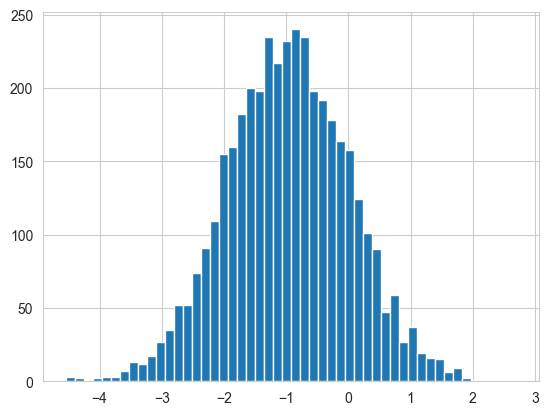

In [39]:
plt.hist(samples['theta'].numpy().flatten(),  bins=50)